<a href="https://colab.research.google.com/github/sheilambadi/zindi-womxn-challenge./blob/master/smbadi_Zindi_Womxn_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
ls "drive/My Drive/Colab Notebooks/Zindi_Womxn_Challenge/"

In [0]:
! cp "drive/My Drive/Colab Notebooks/Zindi_Womxn_Challenge/Train.csv" Train.csv
! cp "drive/My Drive/Colab Notebooks/Zindi_Womxn_Challenge/Test.csv" Test.csv
! cp "drive/My Drive/Colab Notebooks/Zindi_Womxn_Challenge/variable_descriptions.csv" variable_descriptions.csv
! cp "drive/My Drive/Colab Notebooks/Zindi_Womxn_Challenge/SampleSubmission.csv" SampleSubmission.csv

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

## Read Data

In [9]:
train_data = pd.read_csv('Train.csv')
pd.set_option('display.max_columns', None)
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [10]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [11]:
var_desc_data = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200)
var_desc_data.head()

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN


## Exploratory data analysis

In [12]:
# get estimate of no of features
var_desc_data.shape

(60, 4)

In [13]:
train_data.shape

(2822, 63)

**63 features present in data**

In [14]:
test_data.shape

(1013, 62)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
ward                 2822 non-null object
total_households     2822 non-null float64
total_individuals    2822 non-null float64
target               2822 non-null float64
dw_00                2822 non-null float64
dw_01                2822 non-null float64
dw_02                2822 non-null float64
dw_03                2822 non-null float64
dw_04                2822 non-null float64
dw_05                2822 non-null float64
dw_06                2822 non-null float64
dw_07                2822 non-null float64
dw_08                2822 non-null float64
dw_09                2822 non-null float64
dw_10                2822 non-null float64
dw_11                2822 non-null float64
dw_12                2822 non-null int64
dw_13                2822 non-null int64
psa_00               2822 non-null float64
psa_01               2822 non-null float64
psa_02               2822 non-null flo

In [0]:
test_data.info()

In [20]:
train_data.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,0.039296,0.064586,0.006864,0.001112,0.007902,0.0,0.0,0.311268,0.526568,0.000541,0.033694,0.127929,0.225922,0.774078,0.250312,0.749688,0.097637,0.902363,0.097603,0.058684,0.029416,0.039983,0.284316,0.116772,0.108053,0.130673,0.004621,0.024319,0.024262,0.053985,0.012809,0.0,0.014503,0.862142,0.040938,0.018798,0.074429,0.003693,0.836432,0.359691,0.329684,0.127555,0.041589,0.019655,0.011008,0.110818,0.0,0.0,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,0.057889,0.109802,0.016819,0.003041,0.024762,0.0,0.0,0.076627,0.085116,0.000827,0.023375,0.036231,0.173811,0.173811,0.193682,0.193682,0.131082,0.131082,0.203996,0.123658,0.089490,0.083454,0.367565,0.255293,0.220157,0.260619,0.004607,0.117359,0.125629,0.161805,0.021413,0.0,0.040362,0.247392,0.142317,0.077927,0.169270,0.010813,0.203143,0.304472,0.236642,0.156400,0.057331,0.032926,0.023672,0.185401,0.0,0.0,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.001293,0.000000,0.000000,0.042789,0.000000,0.159514,0.000000,0.041328,0.000000,0.237387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,0.004716,0.002888,0.000233,0.000000,0.001991,0.0,0.0,0.255573,0.467217,0.000133,0.016981,0.110139,0.098199,0.696622,0.130976,0.718512,0.017315,0.879127,0.002842,0.009433,0.004081,0.001647,0.010344,0.001675,0.002681,0.003906,0.001675,0.000297,0.000300,0.000495,0.002589,0.0,0.000000,0.875275,0.001015,0.000877,0.000451,0.000664,0.796471,0.087638,0.111282,0.008673,0.002099,0.000715,0.000159,0.005217,0.0,0.0,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,0.016295,0.014991,0.001755,0.000391,0.004092,0.0,0.0,0.301668,0.540874,0.000338,0.027048,0.125760,0.172787,0.827213,0.178032,0.821968,0.040144,0.959856,0.007914,0.017589,0.008956,0.008835,0.052528,0.003986,0.017154,0.008403,0.003045,0.001267,0.001200,0.003261,0.006394,0.0,0.000146,0.989752,0.003124,0.001797,0.001208,0.001696,0.914060,0.277999,0.302130,0.069065,0.016496,0.005164,0.001459,0.025165,0.0,0.0,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,0.048730,0.074748,0.006507,0.001043,0.007803,0.0,0.0,0.371197,0.586087,0.000684,0.043500

**Diff in mean and 50th percentile as well as 75% and max show outliers**
*Visualize some below*

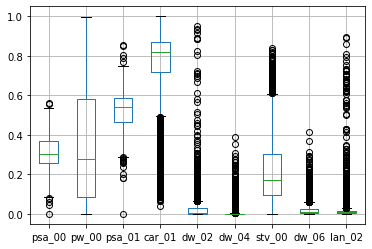

In [21]:
# Box plot to see data distribution - to picture outliers
train_data.boxplot(column=['psa_00', 'pw_00', 'psa_01', 'car_01', 'dw_02', 'dw_04', 'stv_00', 'dw_06', 'lan_02'])

In [22]:
test_data.describe()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0,1013.0,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0,1013.0,1013.000000,1013.000000,1013.000000
mean,3126.764779,11671.898368,0.535071,0.247397,0.047997,0.004110,0.005370,0.027433,0.027838,0.031920,0.057322,0.005392,0.001337,0.008814,0.0,0.0,0.302237,0.525344,0.000483,0.040986,0.130951,0.196976,0.803024,0.255375,0.744625,0.150880,0.849120,0.282092,0.074914,0.002124,0.571472,0.004417,0.001821,0.022253,0.002776,0.005454,0.000371,0.000609,0.000719,0.009038,0.0,0.021939,0.657213,0.239398,0.004755,0.092057,0.006577,0.783276,0.429350,0.142021,0.150799,0.049807,0.018107,0.010757,0.199159,0.0,0.0,-32.690435,24.763302,13.653903
std,2766.674568,9152.794041,0.282139,0.322355,0.081129,0.009825,0.015581,0.069494,0.042059,0.051250,0.120189,0.011585,0.002739,0.014752,0.0,0.0,0.091691,0.100848,0.000949,0.035295,0.051018,0.174513,0.174513,0.234302,0.234302,0.186763,0.186763,0.356128,0.132285,0.001421,0.403818,0.007704,0.001295,0.082782,0.002233,0.004180,0.000516,0.000743,0.001472,0.014616,0.0,0.059825,0.402573,0.331012,0.013695,0.190538,0.010754,0.265247,0.376962,0.165796,0.183372,0.069200,0.029505,0.021147,0.309536,0.0,0.0,1.217243,4.214377,18.659450
min,106.083320,359.881550,0.005075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.034533,0.036337,0.000000,0.000342,0.033153,0.003427,0.204973,0.023250,0.040490,0.003739,0.191329,0.000584,0.004048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011043,0.000000,0.000000,0.000000,0.000000,0.001048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-34.670197,17.917653,0.000000
25%,1668.381650,6638.455370,0.291854,0.003169,0.007071,0.000262,0.000000,0.000482,0.005736,0.002540,0.001614,0.000552,0.000000,0.002354,0.0,0.0,0.228810,0.447153,0.000052,0.020227,0.109325,0.053339,0.707368,0.087283,0.643382,0.017231,0.776039,0.005149,0.015558,0.001113,0.070375,0.001582,0.000860,0.002163,0.001193,0.002374,0.000000,0.000159,0.000000,0.001201,0.0,0.000000,0.169128,0.001187,0.000701,0.000550,0.000663,0.732407,0.021086,0.015857,0.005518,0.001515,0.000621,0.000000,0.004699,0.0,0.0,-33.876457,19.471822,0.633632
50%,2068.755670,8255.902170,0.582595,0.014361,0.020828,0.001046,0.000753,0.002224,0.012807,0.010125,0.005290,0.001807,0.000506,0.004830,0.0,0.0,0.275173,0.539947,0.000233,0.030593,0.123458,0.146387,0.853613,0.148246,0.851754,0.062770,0.937230,0.019697,0.025800,0.001905,0.820466,0.002826,0.001631,0.003552,0.002182,0.004412,0.000206,0.000409,0.000246,0.004097,0.0,0.000899,0.969625,0.013677,0.001602,0.001843,0.003028,0.882198,0.412824,0.081665,0.063770,0.013633,0.003820,0.001205,0.017578,0.0,0.0,-32.935001,26.544448,3.364445
75%,3159.075650,11899.225710,0.789347,0.531209,0.052814,0.002717,0.002662,0.016812,0.029831,0.038401,0.046177,0.005414,0.001460,0.009088,0.0,0.0,0.386293,0.606485,0.000532,0.050318,0.141984,0.292632,0.946661,0.356618,0.912717,0.223961,0.982769,0.638433,0.0

In [23]:
# get percentages with the most values
unique_values = pd.DataFrame(train_data['target'].astype(int).unique())
target_count = train_data['target'].astype(int).value_counts()
target_count.head()

19    112
22    100
21     98
26     97
23     95
Name: target, dtype: int64

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

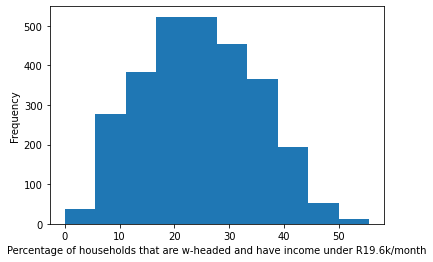

In [24]:
# Plot the distribution
ax = train_data['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

**Most percentages fall between 10-40%**

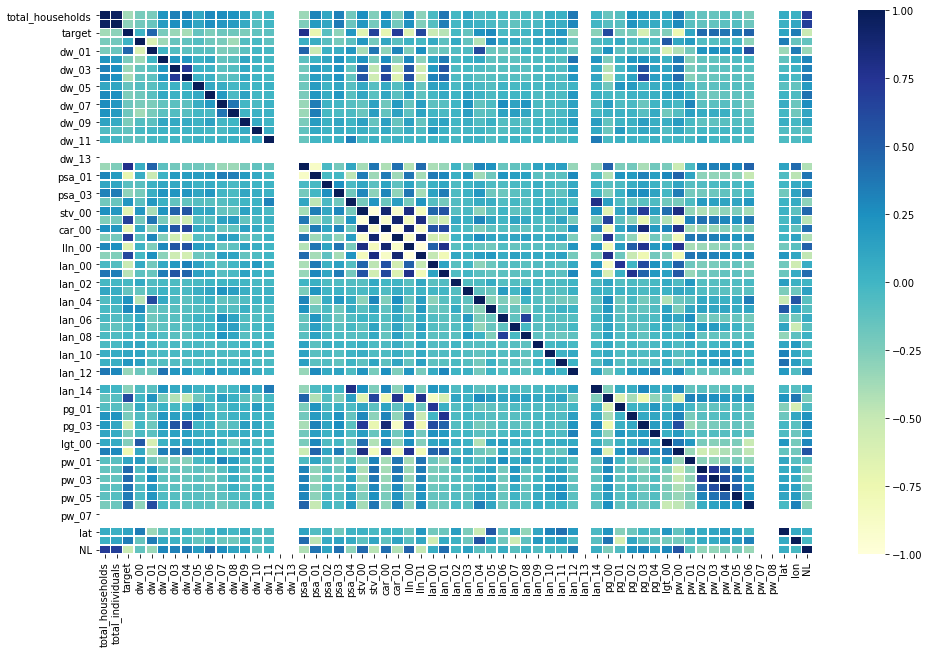

In [25]:
# Calculate correlations
corr = train_data.corr()

plt.figure(figsize = (16,10))
sns.heatmap(corr, cmap="YlGnBu", linewidths=.5)

In [26]:
sorted_corr = abs(corr['target']).sort_values(ascending=False)
sorted_corr.tail(15)
sorted_corr.head()

target    1.000000
psa_00    0.782472
pw_00     0.754536
psa_01    0.707506
car_01    0.702831
Name: target, dtype: float64

**psa_00, pw_00, psa_01 and car_01 have a very strong correlation with target**
**lan have a very weak correlation with target - almost non existent**

### Look at some interestion correlations

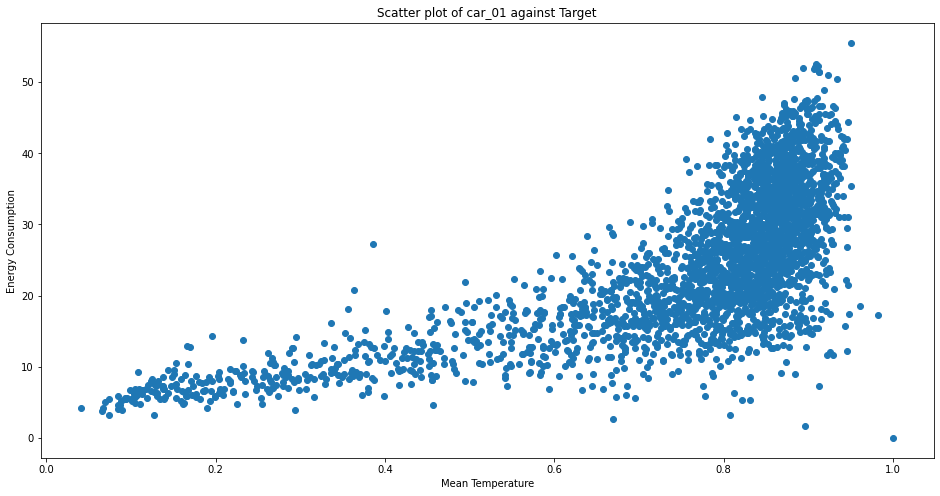

In [27]:
# plot scatter plot
plt.figure(figsize = (16,8))
plt.scatter(train_data['car_01'], train_data['target'])
plt.title('Scatter plot of car_01 against Target')
plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')
plt.show()

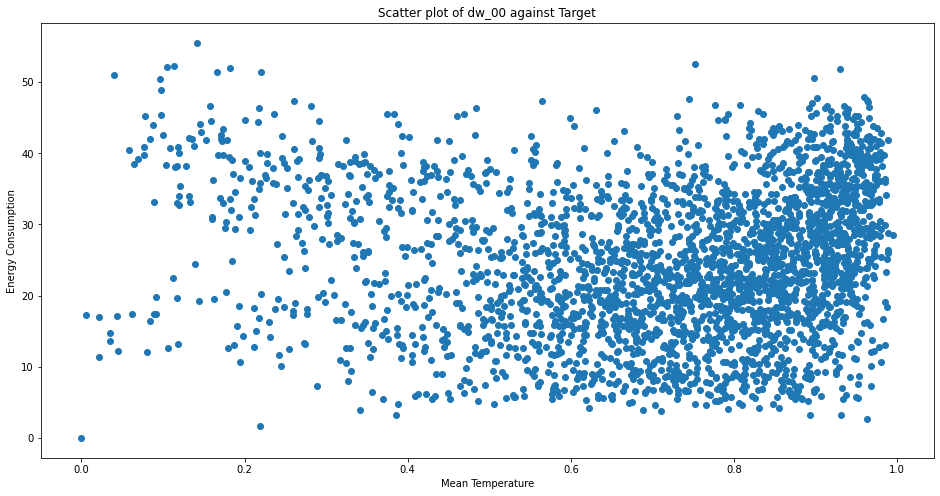

In [28]:
# plot scatter plot
plt.figure(figsize = (16,8))
plt.scatter(train_data['dw_00'], train_data['target'])
plt.title('Scatter plot of dw_00 against Target')
plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')
plt.show()

## Model Data

**Model first to see how complex the problem and provide baseline for comparison then do feature engineering**

*Linear model, Non-linear model, Non parametric*

**Split data into train and test sets**

In [29]:
# get predictor and response variables
x_variables = train_data.drop('ADM4_PCODE', axis=1).columns[4:]

X = train_data[x_variables]
Y = train_data['target']

X.head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,-29.682270,24.734743,0.292039
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,-29.119311,24.757737,3.207775
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,-29.142276,25.094093,0.000000
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,-29.372052,24.942867,2.038778
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,-29.409381,25.290165,0.000000


In [30]:
# do 10 fold cross validation
kf = KFold(n_splits=10, shuffle=False)

# Demonstrating splits
for train_index, test_index in kf.split(X):
    print(X.iloc[train_index].shape, X.iloc[test_index].shape)

(2539, 58) (283, 58)
(2539, 58) (283, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)


### Linear Regression Model

In [31]:
scores = []

for train_index, test_index in kf.split(X):
    # split into train and test data set
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    # fit/train model
    model = LinearRegression().fit(X_train, Y_train)
    
    #make predictions
    pred = model.predict(X_test)
    
    # calculate root mean squared error
    mse = mean_squared_error(Y_test, pred)
    rmse = np.sqrt(mse)
    
    # append to scores
    scores.append(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

Average score in 10-fold CV: 3.9875550781904545


## KNN Regression - Non linear model

In [32]:
scores = []

for train_index, test_index in kf.split(X):
    # split into train and test data set
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    # fit/train model
    model = KNeighborsRegressor(n_neighbors=6).fit(X_train, Y_train)
    
    #make predictions
    pred = model.predict(X_test)
    
    # calculate root mean squared error
    mse = mean_squared_error(Y_test, pred)
    rmse = np.sqrt(mse)
    
    # append to scores
    scores.append(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

Average score in 10-fold CV: 6.762461431746928


## Making a submission

In [33]:
# submission format
pd.read_csv('SampleSubmission.csv').head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


## Linear regression submission

In [34]:
# clean up test data
x_test_variables = test_data.drop('ADM4_PCODE', axis=1).columns[3:]

X_test = test_data[x_variables]

X_test.head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
0,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,-32.637758,23.848688,0.000000
1,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,-31.990536,24.555818,0.000000
2,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,-32.283595,24.563940,8.269556
3,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,-32.261612,24.542202,8.626625
4,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,-32.251571,24.558537,8.601754


In [35]:
# fit/train model
lin_model = LinearRegression().fit(X, Y)

#make predictions
test_data_lin = test_data
test_data_lin['target'] = lin_model.predict(X_test)
test_data_lin.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,20.566162
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,13.841736
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,21.388153
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,18.755005
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,21.964600


## KNN regression submission

In [36]:
# fit/train model
knn_model = KNeighborsRegressor(n_neighbors=6).fit(X, Y)

#make predictions
test_data_knn = test_data
test_data_knn['target'] = knn_model.predict(X_test)
test_data_knn.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,18.151822
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,17.864034
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,17.273119
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,17.951309
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,17.951309


### Save and submit linear model

In [0]:
test_data_knn[['ward', 'target']].to_csv('knn_submission1.csv', index=False)